# my classifier

The classification solution:

* Given two or more categories of observation 
* Extract numerical features for each observation
* Train some kind of model of each category
* Use the model to predict the category of new observations
* This is the basis of **supervised machine learning**
 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [2]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

print("Data:", X[:10])
print("Labels:", y[:10])

Data: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels: [0 0 0 0 0 0 0 0 0 0]


In [3]:
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

# Compute the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rcParams['figure.figsize'] = (6, 6)


(1.0, 5.380000000000004)

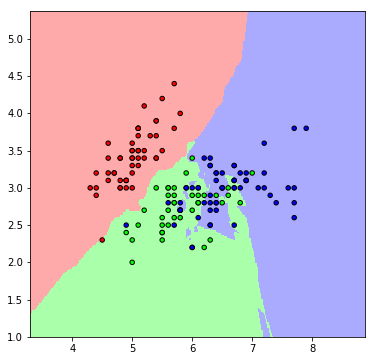

In [5]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())

E:\python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app
E:\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


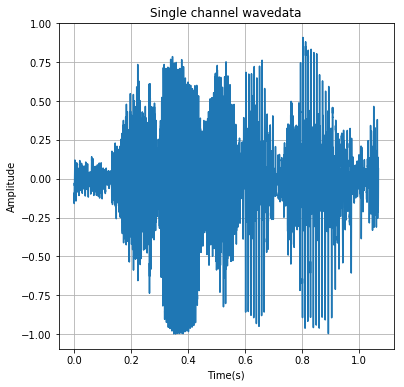

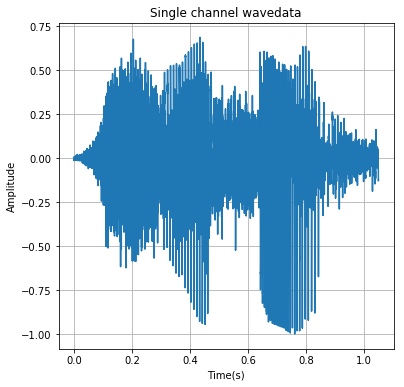

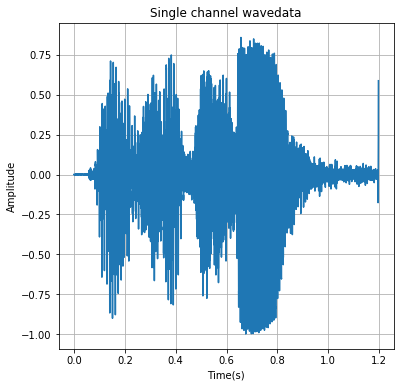

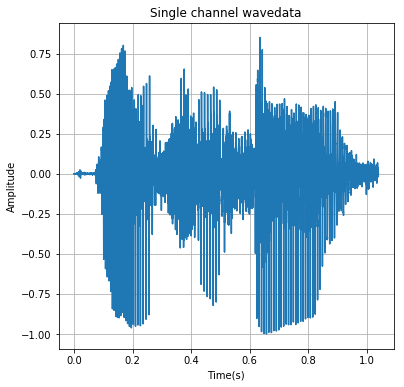

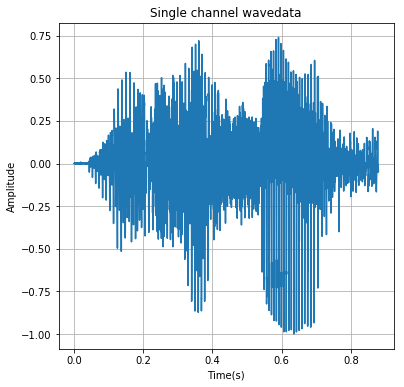

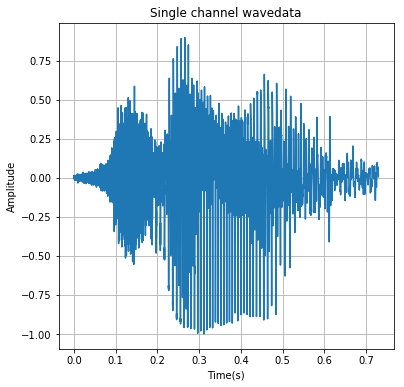

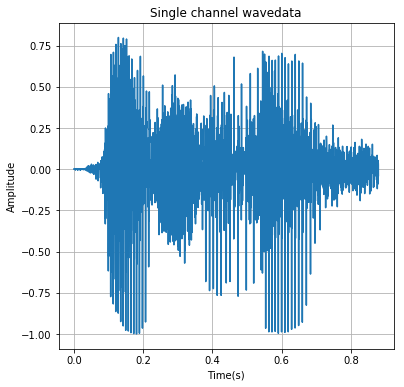

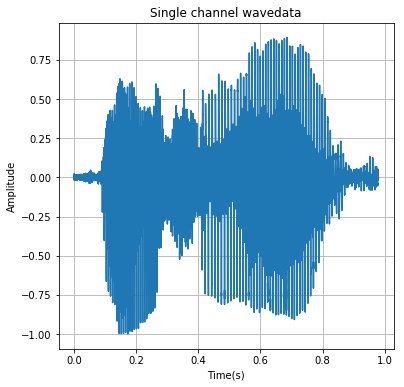

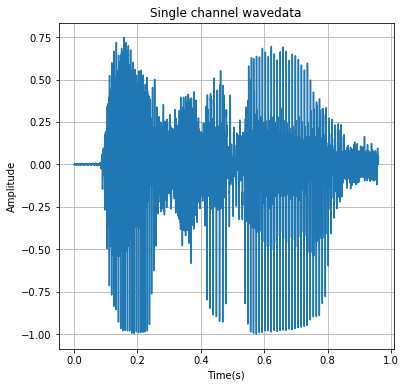

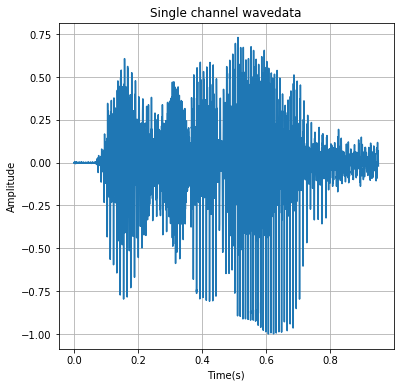

In [40]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave
import math

filepath = "E:/01/1c-M/1c_M_Ch/"
filename = os.listdir(filepath)
length=len(filename)
for i in range(length):
     f = wave.open(filepath+filename[i],'r')
     params = f.getparams()
     nchannels, sawpwidth, framerate, nframes = params[ :4]
     strData = f.readframes(nframes)#读取音频，字符串格式
     waveData = np.fromstring(strData,dtype=np.int16)#将字符串转化为int
     waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
     # plot the wave
     time = np.arange(0,nframes)*(1.0 / framerate)
     plt.figure(i)
     plt.plot(time,waveData)
     plt.xlabel("Time(s)")
     plt.ylabel("Amplitude")
     plt.title("Single channel wavedata")
     plt.grid('on')#标尺，on：有，off:无。